In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


data = pd.read_csv("/home/simplon/Téléchargements/netflix_titles.csv", index_col=[0])

FileNotFoundError: [Errno 2] File /home/simplon/Téléchargements/netflix_titles.csv does not exist: '/home/simplon/Téléchargements/netflix_titles.csv'

In [3]:
pays_10 = data.country.value_counts().head(10)
print(pays_10)

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64


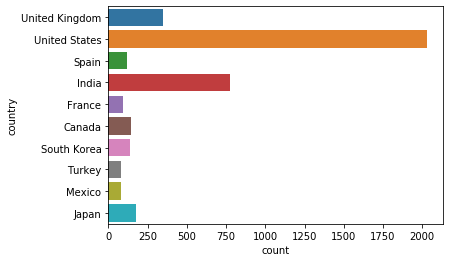

In [16]:
defpays = data.loc[data["country"].isin(pays_10.index)]
#print(defpays)
sns.countplot(y = "country", data = defpays)
plt.show()

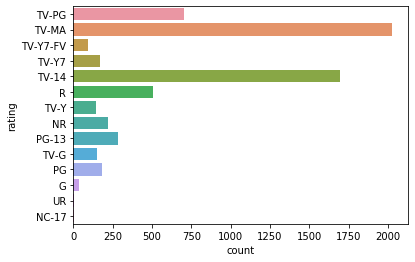

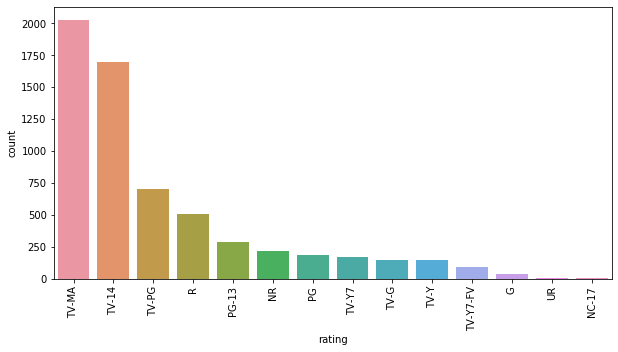

In [22]:
#----------------------15----------------------------

sns.countplot(y = "rating", data = data)
plt.show()

#15. Tracer un graphe à barres du nombre de films/séries parclassement de contenu (rating)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='rating', data= data, order = data['rating'].value_counts().keys())
plt.xticks(rotation=90)
plt.show()

In [29]:
#--------------------16-------------------------------

data2 = data[data['date_added'].notna()]
year_added = pd.to_datetime(data2["date_added"]).dt.year
print(year_added)


show_id
81145628    2019
80117401    2016
70234439    2018
80058654    2018
80125979    2017
            ... 
80162994    2019
80186475    2019
70272742    2016
80067942    2016
70136122    2014
Name: date_added, Length: 6223, dtype: int64


In [30]:
data['year_added']=year_added

In [32]:
data_group = data.groupby(['type', 'year_added']).size().reset_index(name='count')
print(data_group)

       type  year_added  count
0     Movie      2008.0      1
1     Movie      2009.0      2
2     Movie      2010.0      1
3     Movie      2011.0     13
4     Movie      2012.0      4
5     Movie      2013.0      6
6     Movie      2014.0     19
7     Movie      2015.0     58
8     Movie      2016.0    264
9     Movie      2017.0    913
10    Movie      2018.0   1290
11    Movie      2019.0   1546
12    Movie      2020.0    147
13  TV Show      2008.0      1
14  TV Show      2012.0      3
15  TV Show      2013.0      6
16  TV Show      2014.0      6
17  TV Show      2015.0     32
18  TV Show      2016.0    192
19  TV Show      2017.0    387
20  TV Show      2018.0    492
21  TV Show      2019.0    803
22  TV Show      2020.0     37


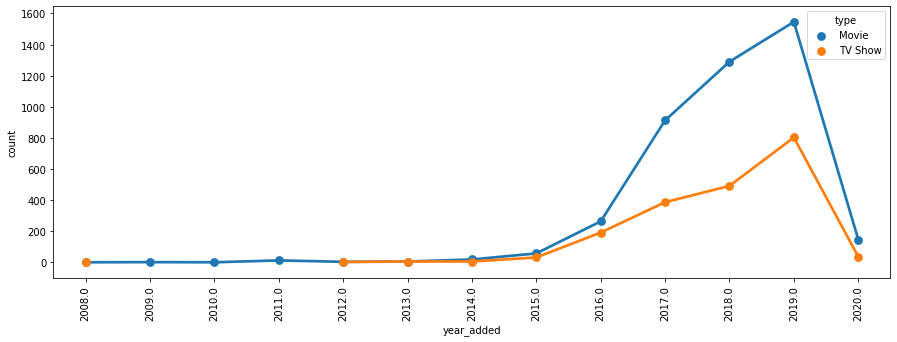

In [34]:
#4thpart
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.pointplot('year_added', 'count', hue = 'type', data=data_group)

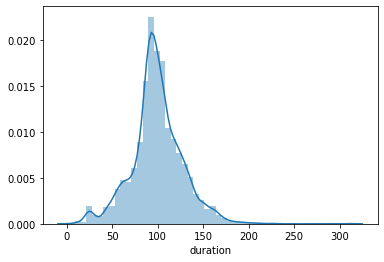

In [41]:
#-----------------17--------------------------

movie = data.loc[data["type"]=="Movie"]

duree = pd.Series(movie['duration']).str.replace("min","").astype("int").sort_values(ascending=False)
sns.distplot(duree)



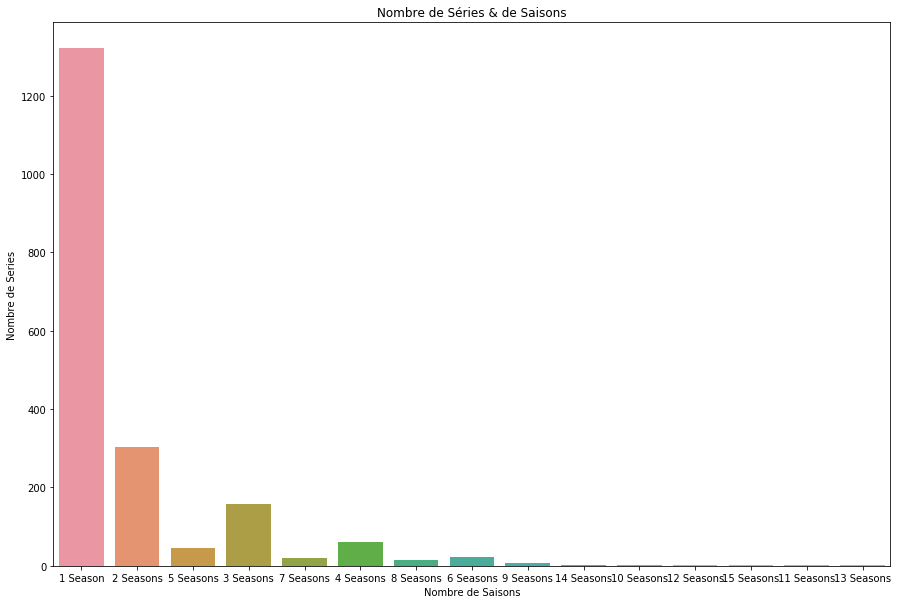

In [58]:
#--------------------18----------------------

tvshow = data.loc[data["type"]=="TV Show"]
# tvshow

plt.figure(figsize=(15,10))
sns.countplot(x = "duration", data = tvshow)
plt.title("Nombre de Séries & de Saisons")
plt.ylabel("Nombre de Series")
plt.xlabel("Nombre de Saisons")
plt.show()

In [3]:
import pandas as pd
"""
data = pd.read_csv("/home/simplon/Téléchargements/netflix_titles.csv", index_col=[0])



print(data)
data2 = data.head()

print(data2)
data3 = data.shape

print(data3)


film = data.loc[data["type"] == "Movie", "type"].value_counts()
serie = data.loc[data["type"] == "TV Show", "type"].value_counts()


print(film)
print(serie)


data4 =  data.describe(include= "all")
print(data4)




data5 = data.isna().sum()
print(data5)





direct = data.loc[data["director"].isna()]




# correction:
print(direct.type.value_counts())




print(direct.loc[direct["type"] == "Movie", "type"].value_counts())
print(direct.loc[direct["type"] == "TV Show", "type"].value_counts())


wa = data.loc[data.cast.isna()]


print(wa.listed_in.value_counts().head(10))

dup = data.duplicated()
print(dup)

drop = data.drop_duplicates()
print(drop)

france = data[data["country"]=="France"]
print(france)

us = data[data["country"]=="United States"]
print(us)

print(france.shape, us.shape)

annee = data.release_year.min()
print(annee)

# correction :
data_older = data.loc[data.release_year == data.release_year.min(), ["title", "release_year"]]
print(data_older)




# correction :

#9. Afficher le contenu le plus vieux disponible sur Netflix
data_older = data.loc[data.release_year == data.release_year.min(), ['title', 'release_year']]
print(data_older)
#10. Afficher le film avec la durée la plus longue sur Netflix
#Afficher les 5 films les + long(juste la durée)
data_movies = data.loc[data.type == 'Movie']
duree = pd.Series(data_movies['duration']).str.replace(" min", "").astype('int').sort_values(ascending=False).head(5)
print(duree)

#Affiche les 5 films avec toutes les infos(version merge & series)
data_movies = data.loc[data.type == 'Movie']
duree = pd.Series(data_movies['duration']).str.replace(" min", "").astype('int').sort_values(ascending=False).head(5)
data_merged = pd.merge(data, duree.to_frame(), on='show_id', how='inner')
data_film_duration = data_merged.sort_values(by='duration_x', ascending=False).head(5)[["title", "duration_x"]]
print(data_film_duration)

#Affiche les 5 films avec toutes les infos
data["duration"] = pd.Series(data_movies['duration']).str.replace(" min", "").astype('int')
data_film_duration_2 = data.sort_values(by='duration', ascending=False).head(5)[["title", "duration"]]
print(data_film_duration_2)





# correction :
data["listed_in"].head(10)

# ", ".join(data["listed_in"].dropna())

categories = ", ".join(data["listed_in"].dropna()).split(", ")
categories =pd.Series(categories)
#print(categories)
print(categories.value_counts().head())





# ---------------12------------------------------
director = ", ".join(data["director"].dropna()).split(", ")
director =pd.Series(director)
print(director)
print(director.value_counts().head(10))
 

#-----------------13------------------------------

director2 = data.loc[data['director'].notna()]
print(director2)
"""
donnees_jan_suter = donnees.loc[donnees["director"].notna()]
jan_suter = donnees_jan_suter.loc[donnees_jan_suter["director"].str.contains("Jan Suter")]
print(jan_suter)
"""



#---------------14-----------------------------

import seaborn as sns 

"""





NameError: name 'donnees' is not defined